In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

h = var("h")
a = var("a")

m = var("m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(h, "real")
assume(h > 0)
assume(a, "real")
assume(a > 0)

assume(m, "real")
assume(m >= 0)

#Propulsion and Energy Forum
#July 28-30, 2014, Cleveland, OH
#50th AIAA/ASME/SAE/ASEE Joint Propulsion Conference
#Anomalous Thrust Production from an RF Test Device
#Measured on a Low-Thrust Torsion Pendulum
#David A. Brady * , Harold G. White † , Paul March ‡ , James T. Lawrence § , and Frank J. Davies **
#NASA Lyndon B. Johnson Space Center, Houston, Texas 77058


#Tapered Cavity RF Evaluation and Testing, TE012 mode
#Prior to the TM211 evaluations, COMSOL® analysis indicated that the TE012 was an effective thrust generation
#mode for the tapered cavity thruster being evaluated, so this mode was explored early in the evaluation process.
#Figure 22 shows a test run at the TE012 mode with an operating frequency of 1880.4 MHz. The measured quality
#factor was ~22,000, with a COMSOL prediction of 21,817. The measured power applied to the test article was
#measured to be 2.6 watts, and the (net) measured thrust was 55.4 micronewtons. With an input power of 2.6 watts,
#correcting for the quality factor, the predicted thrust is 50 micronewtons. However, since the TE012 mode had
#numerous other RF modes in very close proximity, it was impractical to repeatedly operate the system in this mode,
#so the decision was made to evaluate the TM211 modes instead.

#E. Tapered Cavity Testing: Summary of Results
# Mode 
# Frequency (MHz)
# Quality Factor, Q 

# Input Power (W) 
# Peak Thrust (μN) 
# Mean Thrust (μN) 
# Number of Test Runs
# TM211 1932.6   7320  16.9  116.0   91.2  5
# TM211 1936.7 18,100  16.7   54.1   50.1  2
# TE012 1880.4 22,000   2.6   55.4   55.4  1

# Harrington, Roger F. (1961). Time-Harmonic Electromagnetic Fields. McGraw-Hill. ISBN 9780070267459.

# EEE TRANSACTIONS ON MICROWAVE THEORY AND TECHNIQUES, VOL. 54, NO. 4, APRIL 2006
# Two-Resonator Method for Measurement of Dielectric Anisotropy in Multilayer SamplesPlamen I. Dankov, Member, IEEE
# https://www.researchgate.net/publication/3131333_Two-resonator_method_for_measurement_of_dielectric_anisotropy_in_multilayer_samples

m_val = 1
n_val = 0
h_val = 0

E_mode = False
n_layers = 3

a_val = 12

In [4]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001):
    try:
        free_variable = func.variables()[0]
    except:
        free_variable = x
    #print("free_variable", free_variable)
    #print("func", func(1))
    L = []
    if b - a < tol:
        return L
    try:
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        x0 = find_root(func,a,b)
        #exec("print(func(" + preparse(str(free_variable)) + "=x0))")
        #print ("x0 =", x0, func(free_variable=x0))
        L.append(x0)
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        #print(str(ex))
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        #exec("print(func(" + preparse(str(free_variable)) + "=a))")
        #exec("print(func(" + preparse(str(free_variable)) + "=b))")
        pass
    return L

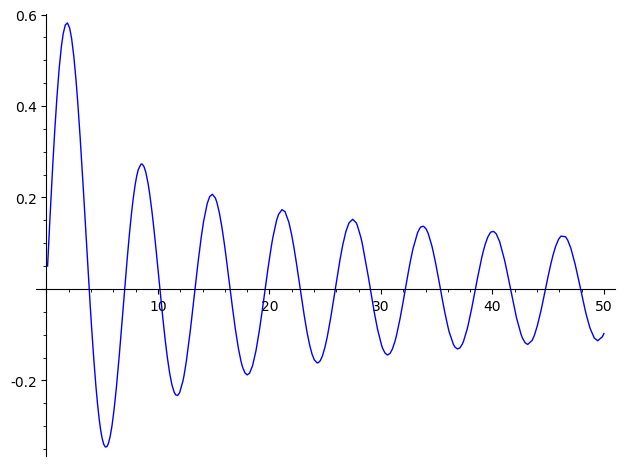

[3.831705970207552,
 7.015586669815619,
 10.173468135062722,
 13.323691936314223,
 16.470630050877634,
 19.615858510468243,
 22.760084380592772,
 25.90367208761827,
 29.046828534916855,
 32.189679910974405,
 35.33230755008384,
 38.474766234771614,
 41.61709421281445,
 44.75931899765282,
 47.90146088718542]

In [7]:
plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

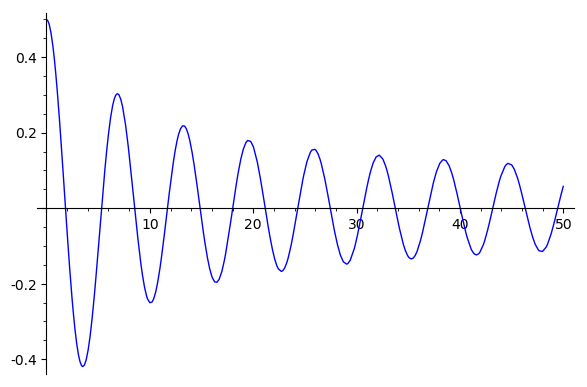

[1.8411837813406593,
 5.3314427735250325,
 8.536316366346286,
 11.706004902592063,
 14.863588633909105,
 18.015527862681804,
 21.16436985918879,
 24.311326857210776,
 27.457050571059245,
 30.601922972669094,
 33.746182898667385,
 36.88998740923681,
 40.03344405335064,
 43.17662896544882,
 46.31959756117407,
 49.462391139702774]

In [8]:
plot(bessel_J_d(m_val,x),0.1,50).show()
first_bessel_d_roots = find_root_recursive(bessel_J_d(m_val,x),0.1,50)
first_bessel_d_roots.sort()
first_bessel_d_roots

In [9]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("mu += [mu_" + str(i) +"]")

In [10]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("assume(epsilon_" + str(i) + ", 'real')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [11]:
sigma = []
for i in range(n_layers):
    exec("sigma_" + str(i) + "= var('sigma_" + str(i) + "')")
    exec("assume(sigma_" + str(i) + ", 'real')")
    exec("sigma += [sigma_" + str(i) +"]")

In [12]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [13]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [14]:
C_z = []
for i in range(n_layers):
    exec("C_z_" + str(i) + "= var('C_z_" + str(i) + "')")
    exec("assume(C_z_" + str(i) + ", 'real')")
    exec("C_z += [C_z_" + str(i) +"]")

In [15]:
D_z = []
for i in range(n_layers):
    exec("D_z_" + str(i) + "= var('D_z_" + str(i) + "')")
    exec("assume(D_z_" + str(i) + ", 'real')")
    exec("D_z += [D_z_" + str(i) +"]")

In [16]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

In [17]:
s = []
for i in range(n_layers):
    exec("s_" + str(i) + "= var('s_" + str(i) + "')")
    exec("assume(s_" + str(i) + ", 'real')")
    exec("s += [s_" + str(i) +"]")

$\vec{E} = \vec{E}\,e^{-i\,\omega\,t}$

$\vec{H} = \vec{H}\,e^{-i\,\omega\,t}$


$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$


$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E} \right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\left(\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} + i\,\frac{4\pi\omega}{c^2} \sigma \right)\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$



Ищем решение в виде

$E_{z}\left({\rho}, {\phi}, \mathit{z}\right) = E_{z}(\rho)\,E_{z}(\phi)\,E_{z}(z)$

подставляя в исходное уравнение

In [18]:
# подставляя в исходное уравнение 
if False:
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    H = ES.vector_field(
        function('H_rho_rho')(rho) * function('H_rho_phi')(phi) * function('H_rho_z')(zz),
        function('H_phi_pho')(rho) * function('H_phi_phi')(phi) * function('H_phi_z')(zz),
        function('H_z_rho')  (rho) * function('H_z_phi')  (phi) * function('H_z_z')  (zz),
        name='H')

    E = ES.vector_field(
        function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
        function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
        function('E_z_rho')  (rho) * function('E_z_phi')  (phi) * function('E_z_z')  (zz),
        name='E')

    E = ES.vector_field(
        function('E_rho')(rho,phi,zz),
        function('E_phi')(rho,phi,zz),
        function('E_z')(rho,phi,zz),
        name='E')
    
    H = ES.vector_field(
        function('H_rho')(rho,phi,zz),
        function('H_phi')(rho,phi,zz),
        function('H_z')(rho,phi,zz),
        name='H')
    
    #E = ES.vector_field(
    #    function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
    #    function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
    #    function('E_z_rho')  (rho) * cos(m*phi) * e^(I*k[0]*zz),
    #    name='E')
    
    from sage.manifolds.operators import curl, laplacian
    rot_rot_E = curl(curl(E))
    rot_rot_H = curl(curl(H))
    laplacian_E = laplacian(E)

    #print (rot_rot_E.display())
    #print (rot_rot_H.display())
    #print (laplacian_E.display())
    
    #eq_z = (rot_rot_E[3] - mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand()
    #display(Math(latex(eq_z.expr())))
    
    eq_z = (laplacian_E[3] + mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand().expr() == 0
    display(Math(latex(eq_z)))

we have 

$\frac{\epsilon \mu \omega^{2} E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right) + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)$


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming

$E_{z}(\phi) = sin(m\,\varphi + \psi_{m})$

and

$E_{z}(z) = e^{i\,k\,z}$

or

$E_{z}(z) = cos\left(k\,z\right)$
or
$E_{z}(z) = sin\left(k\,z\right)$

приходим к обыкновенному дифференциальному уравнению


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

assuming

$\kappa^2 = \frac{\mu \, \epsilon \, \omega^2}{c^2} - k^2$

we will receive equation of Bessel type

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$


In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega}\,i$ we have

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming for metals

$E_{z}(z) = e^{i\,k'\,z}$

with complex $k' = k + i\,s$

$E_{z}(z) = e^{i\,k\,z} \, e^{-s\,z}$

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k'^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} - k'^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$k'^2 
= \left(k + i\,s \right)^2
= k^2 - s^2 + 2\,i\,k\,s$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2}
+\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2}
- k^2 + s^2 - 2\,i\,k\,s
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$- 2\,i\,k\,s +\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} = 0 $

$ 2\,k\,s = \frac{4\pi\,\mu\,\sigma\,\omega}{c^2}$

assuming now

$
\kappa^2 = \frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2}
- k^2 + s^2
$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

Dielectrics

assuming for dielectrics

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega'\,t}$

with complex $\omega' = \omega - i\,\alpha$

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega\,t} \, e^{-\alpha\,t}$

In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega'}\,i$ we have

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$



$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \, \omega'^2}{c^2} - k^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$\omega'^2 
= \left(\omega - i\,\alpha \right)^2
= \omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega'^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\omega'}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\omega - i\,\alpha \right)}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\alpha^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i = 0$

$2\pi\,\sigma = \epsilon_{\alpha\,\beta}\,\alpha$

$\alpha = \frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}$


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\alpha^2\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{2\,\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
+\frac{\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

assuming now

$
\kappa^2 = \frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

In [19]:
# исходя из вида дифференциальных уравнений для metal
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_metal = []
eq_s_metal = []
for i in range(n_layers):
    eq_kappa_metal += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 + s[i]^2 == kappa^2]
    eq_s_metal     += [4 * pi * mu[i] * sigma[i] * omega / c^2 == 2 * k[i] * s[i]]

display(Math(latex(eq_kappa_metal)))
display(Math(latex(eq_s_metal)))

eq_kappa_metal_s = []
for i in range(n_layers):
    eq_kappa_metal_s += [eq_kappa_metal[i].subs(solve(eq_s_metal[i],s[i]))]

display(Math(latex(eq_kappa_metal_s)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [21]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_dielectric = []
for i in range(n_layers):
    eq_kappa_dielectric += [mu[i] * epsilon[i] / c^2 * (omega^2 + (2*pi*sigma[i]/epsilon[i])^2) - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa_dielectric)))

<IPython.core.display.Math object>

In [22]:
if True:
    i_layer = 0
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    kk = var("kk")
    assume(kk, "real")
    
    assume(rho, "real")
    assume(phi, "real")
    assume(zz, "real")
    
    E1 = ES.vector_field(
        function('E1_rho')(rho,phi) * e^(I*kk*zz),
        function('E1_phi')(rho,phi) * e^(I*kk*zz),
        function('E1_z')  (rho,phi) * e^(I*kk*zz),
        name='E1')
    
    H1 = ES.vector_field(
        function('H1_rho')(rho,phi) * e^(I*kk*zz),
        function('H1_phi')(rho,phi) * e^(I*kk*zz),
        function('H1_z')  (rho,phi) * e^(I*kk*zz),
        name='H1')
    
    from sage.manifolds.operators import curl, laplacian
    rot_E1 = curl(E1)
    rot_H1 = curl(H1)
    
    eq_rot_E1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_E1 += [ (I * omega * mu[i_layer] / c * H1[j].expr() == rot_E1[j].expr()).expand() ]
    display(Math(latex(eq_rot_E1)))
    
    eq_rot_H1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_H1 += [ (- I * omega / c * epsilon[i_layer] * E1[j].expr() == rot_H1[j].expr()).expand() ]
    display(Math(latex(eq_rot_H1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
E_phi_sol_1 = solve(eq_rot_E1[0], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_1)))
E_phi_sol_2 = solve(eq_rot_H1[1], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_2)))

In [24]:
H_rho_sol_1 = solve(eq_rot_E1[0], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_1)))
H_rho_sol_2 = solve(eq_rot_H1[1], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_2)))

In [25]:
E_phi_solution = solve(E_phi_sol_1[0].subs(H_rho_sol_2),function('E1_phi')(rho,phi) )
#display(Math(latex(E_phi_sol)))
E_phi_solution = solve(E_phi_sol_2[0].subs(H_rho_sol_1),function('E1_phi')(rho,phi) )
display(Math(latex(E_phi_solution)))

<IPython.core.display.Math object>

In [26]:
H_rho_solution = solve(H_rho_sol_1[0].subs(E_phi_sol_2),function('H1_rho')(rho,phi) )
#display(Math(latex(H_rho_sol)))
H_rho_solution = solve(H_rho_sol_2[0].subs(E_phi_sol_1),function('H1_rho')(rho,phi) )
display(Math(latex(H_rho_solution)))

<IPython.core.display.Math object>

In [27]:
E_rho_sol_1 = solve(eq_rot_E1[1], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_1)))
E_rho_sol_2 = solve(eq_rot_H1[0], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_2)))

In [28]:
H_phi_sol_1 = solve(eq_rot_E1[1], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_1)))
H_phi_sol_2 = solve(eq_rot_H1[0], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_2)))

In [29]:
E_rho_solution = solve(E_rho_sol_1[0].subs(H_phi_sol_2),function('E1_rho')(rho,phi) )
#display(Math(latex(E_rho_sol)))
E_rho_solution = solve(E_rho_sol_2[0].subs(H_phi_sol_1),function('E1_rho')(rho,phi) )
display(Math(latex(E_rho_solution)))

<IPython.core.display.Math object>

In [30]:
H_phi_solution = solve(H_phi_sol_1[0].subs(E_rho_sol_2),function('H1_phi')(rho,phi) )
#display(Math(latex(H_phi_sol)))
H_phi_solution = solve(H_phi_sol_2[0].subs(E_rho_sol_1),function('H1_phi')(rho,phi) )
display(Math(latex(H_phi_solution)))

<IPython.core.display.Math object>

In [31]:
H_z = []
H_z_a = [] # sin(k[i]*z) = imag_part()
H_z_b = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        H_z += [lambda rh,ph,z, i=i : 0]
        H_z_a += [lambda rh,ph,z, i=i : 0]
        H_z_b += [lambda rh,ph,z, i=i : 0]
        pass
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph)]
        H_z_a += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        H_z_b += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(B_z[i]*e^(I*k[i]*z)) * cos(m*ph)]

In [32]:
E_z = [] 
E_z_c = [] # sin(k[i]*z) = imag_part()
E_z_d = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*sin(k[i]*z) + D_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_z_c += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        E_z_d += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( D_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]
        E_z_c += [lambda rh,ph,z, i=i: 0]
        E_z_d += [lambda rh,ph,z, i=i: 0]
        pass

In [33]:
var("B")*(e^(I * kk * z)).real_part()

B*cos(kk*z)

In [34]:
# + pi/2
var("B")*(I*e^(I * kk * z)).real_part()

-B*sin(kk*z)

In [35]:
# - pi/2
var("B")*(-I*e^(I * kk * z)).real_part()

B*sin(kk*z)

In [36]:
var("A")*(e^(I * kk * z)).imag_part()

A*sin(kk*z)

In [37]:
# + pi/2
var("A")*(I*e^(I * kk * z)).imag_part()

A*cos(kk*z)

In [38]:
# - pi/2
var("A")*(-I*e^(I * kk * z)).imag_part()

-A*cos(kk*z)

In [39]:
def make_field_formula_old(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('H1_z(rho, phi)', 'H_z[i](rh,ph,z)') \
            .replace('E1_z(rho, phi)', 'E_z[i](rh,ph,z)') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]')
    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print(s)
    #print(i, i_layer)
    f = []
    exec("f += [" + preparse(s) + "]")
    #print(f)
    s = str_replacing(str(f[0]), i, i_layer)
    return s

In [40]:
def expand_re_im_operands(s, expand_real_operands, expand_imag_operands):
    from sage.symbolic.operators import add_vararg, mul_vararg
    s_factor = s.factor()
    #print("s_factor", s_factor)
    if mul_vararg != s_factor.operator():
        print("mul_vararg != s_factor.operator()", s_factor.operator())
        print("re_im(v_expanded)", v_expanded)
        raise ("mul_vararg != s_factor.operator()", s_factor.operator())

    current_s_has_image_part = False
    current_s_has_exp_of_image_part = False

    s_factor_real_operands = ()
    s_factor_imag_operands = ()
    s_factor_complex_exp_operands = ()
    for m in s_factor.operands():
        #print("operand", m, m.operator())
        if bessel_J == m.operator():
            #print("bessel_J == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (m,)
        elif 'bessel_j' == str(m.operator()):
            #print("bessel_j == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (bessel_J(*m.operands()),)
        elif exp == m.operator():
            #print("exp == m.operator() m.operands():",m, m.operands())
            current_exp_has_image_part = False
            for m_operand in m.operands():
                #print("m_operand", m_operand)
                m_operand_imag_part = m_operand.imag_part()
                #print("m_operand_imag_part", m_operand_imag_part)
                #print("type(m_operand_imag_part)", type(m_operand_imag_part))
                #print("type(0)", type(0))
                m_operand_imag_part_is_0 = 0 is m_operand_imag_part
                #print("m_operand_imag_part_is_0", m_operand_imag_part_is_0)
                m_operand_imag_part_eq_0 = 0 == m_operand_imag_part
                bool_m_operand_imag_part_eq_0 = bool(m_operand_imag_part_eq_0)
                #print("m_operand_imag_part_eq_0", m_operand_imag_part_eq_0)
                #print("type(m_operand_imag_part_eq_0)", type(m_operand_imag_part_eq_0))
                if False == bool_m_operand_imag_part_eq_0:
                    #print("current_s_has_exp_of_image_part")
                    current_s_has_exp_of_image_part = True
                    current_exp_has_image_part = True
            if True == current_exp_has_image_part:
                #print("True == current_exp_has_image_part")
                s_factor_complex_exp_operands += (m,)
            else:
                #print("not True == current_exp_has_image_part")
                s_factor_real_operands += (m,)
        else:
            #print("not bessel, not exp", m)
            m_imag_part = m.imag_part()
            #print("m_imag_part", m_imag_part)
            #print("type(m_imag_part)", type(m_imag_part))
            #print("type(0)", type(0))
            m_imag_part_is_0 = 0 is m_imag_part
            #print("m_imag_part_is_0", m_imag_part_is_0)
            m_imag_part_eq_0 = 0 == m_imag_part
            bool_m_imag_part_eq_0 = bool(m_imag_part_eq_0)
            #print("m_imag_part_eq_0", m_imag_part_eq_0)
            #print("bool(m_imag_part_eq_0)", bool(m_imag_part_eq_0))
            #print("type(m_imag_part_eq_0)", type(m_imag_part_eq_0))
            if False == bool_m_imag_part_eq_0:
                #print("current_s_has_image_part = True")
                current_s_has_image_part = True
                s_factor_imag_operands += (I,)
                s_factor_real_operands += (m/I,)
            else:
                #print("not current_s_has_image_part = True")
                s_factor_real_operands += (m,)

    if True == current_s_has_exp_of_image_part:
        #print("current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul_complex_exp = mul_vararg(*(s_factor_imag_operands + s_factor_complex_exp_operands))
            re_out = mul_vararg(*((imag_part_mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((imag_part_mul_complex_exp.imag_part(),) + s_factor_real_operands))
        else:
            #print("not True == current_s_has_image_part")
            mul_complex_exp = mul_vararg(*(s_factor_complex_exp_operands))
            re_out = mul_vararg(*((mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((mul_complex_exp.imag_part(),) + s_factor_real_operands))
    else:
        #print("not current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul = mul_vararg(*(s_factor_imag_operands + s_factor_real_operands))
            re_out = 0
            im_out = imag_part_mul.imag_part()
        else:
            #print("not True == current_s_has_image_part")
            im_out = 0
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            re_out = real_part_mul
    #print("re_out", re_out)
    #print("im_out", im_out)
    expand_real_operands += (re_out,)
    expand_imag_operands += (im_out,)
    
    return (expand_real_operands, expand_imag_operands)


def re_im(v_expanded):
    from sage.symbolic.operators import add_vararg, mul_vararg
    expand_real_operands = ()
    expand_imag_operands = ()    
    if add_vararg == v_expanded.operator():
        for s in v_expanded.operands():
            (expand_real_operands, expand_imag_operands) = expand_re_im_operands(s, expand_real_operands, expand_imag_operands)
    elif mul_vararg == v_expanded.operator():
        (expand_real_operands, expand_imag_operands) = expand_re_im_operands(v_expanded, expand_real_operands, expand_imag_operands)
    else:
        print("add_vararg, mul_vararg != v_expanded.operator()", v_expanded.operator())
        print("re_im(v_expanded)", v_expanded)
        return (v_expanded.real_part(), v_expanded.imag_part())

    if 0 == len(expand_real_operands) and  0 == len(expand_imag_operands):
        return (0, 0)
    if 0 == len(expand_real_operands) and  0 != len(expand_imag_operands):
        return (0, (add_vararg(*expand_imag_operands)).factor())
    if 0 != len(expand_real_operands) and  0 == len(expand_imag_operands):
        return ((add_vararg(*expand_real_operands)).factor(), 0)
    return ((add_vararg(*expand_real_operands)), (add_vararg(*expand_imag_operands)))

def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v
    #return v.real_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return re

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0
    #return v.imag_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return im

In [41]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [42]:
def make_field_formula(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]') \
            .replace('bessel_j', 'bessel_J')

    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print("s =", s)
    
    s_im = s \
        .replace('H1_z(rh, ph)', 'H_z_a[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_c[i](rh,ph,z)')
    s_re = s \
        .replace('H1_z(rh, ph)', 'H_z_b[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_d[i](rh,ph,z)')
    s_all = s \
        .replace('H1_z(rh, ph)', 'H_z[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z[i](rh,ph,z)')
    #print("s_im =", s_im)
    #print("s_re =", s_re)
    #print("s_all =", s_all)
    #print(s)
    #print(i, i_layer)
    f_Im = []
    f_Re = []
    f_im = []
    f_re = []
    f = []
    exec("f_im += [" + preparse("(" + s_im + ").imag_part()") + "]")
    exec("f_re += [" + preparse("(" + s_re + ").real_part()") + "]")
    exec("f_Im += [" + Preparse("Im(" + s_im + ")") + "]")
    exec("f_Re += [" + Preparse("Re(" + s_re + ")") + "]")
    exec("f += [" + Preparse(s_all) + "]")
    #print(f)
    s1 = str_replacing(str(f[0]), i, i_layer)
    s2 = str_replacing(str((f_im[0]+f_re[0]).factor()), i, i_layer)
    s3 = str_replacing(str((f_Im[0]+f_Re[0]).factor()), i, i_layer)
    return (s1, s2, s3)

In [43]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_rho_solution, i, i_layer)
    print("")
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    print(bessel_J_d(m,kappa*rh))


-I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)

-I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)

-I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

-(A_z[i]*cos(k[i]*z) 

In [44]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_phi_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*mu[

In [45]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_rho_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

-1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/k

In [46]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_phi_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

-I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)



In [47]:
r = var('r') #rho
p = var('p') #phi
assume(r, "real")
assume(r > 0)
assume(p, "real")

In [48]:
E_rh = []
for i in range(n_layers):
    if E_mode:
        #E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_rh += [lambda r,p,z, i=i: -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa]
    else:
        #E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(c*kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*cos(k[i]*z) - A_z[i]*sin(k[i]*z)) * sin(m*ph)]
        E_rh += [lambda r,p,z, i=i : -I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]

In [49]:
E_ph = []
for i in range(n_layers):
    if E_mode:
        #E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * sin(m*ph)]
        E_ph += [lambda r,p,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)]
    else:
        # E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*rh)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # 1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        E_ph += [lambda r,p,z, i=i : - I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*r)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*p)]


In [50]:
E_z = []
for i in range(n_layers):
    if E_mode:
        E_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*p)]
    else:
        E_z += [lambda r,p,z, i=i: 0]        

In [51]:
H_rh = []
for i in range(n_layers):
    if E_mode:
        #H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*cos(k[i]*z) - C_z[i]*sin(k[i]*z)) * sin(m*ph)]
        H_rh += [lambda r,p,z, i=i : I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]
    else:
        H_rh += [lambda r,p,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*r)*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*p)]        
        # -1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

In [52]:
H_ph = []
for i in range(n_layers):
    if E_mode:
        #H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        H_ph += [lambda r,p,z, i=i : -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)]
    else:
        #H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*sin(k[i]*z) + A_z[i]*cos(k[i]*z)) * sin(m*ph)]
        # -(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)
        H_ph += [lambda r,p,z, i=i: m*k[i]/(kappa^2*r) * bessel_J  (m,kappa*r)*(B_z[i]*sin(k[i]*z) - A_z[i]*cos(k[i]*z)) * sin(m*p)]
        

In [53]:
H_z = []
for i in range(n_layers):
    if E_mode:
        H_z += [lambda r,p,z, i=i : 0]
    else:
        H_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*p)]                

In [54]:
E_rh[0](r,p,z)

(-I*B_z_0*cos(k_0*z) - I*A_z_0*sin(k_0*z))*m*mu_0*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)

In [55]:
E_ph[0](r,p,z)

1/2*I*(B_z_0*cos(k_0*z) + A_z_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)

In [56]:
if 1 < n_layers:
    E_rh[1](rh,ph,z)

In [57]:
if 1 < n_layers:
    E_ph[1](rh,ph,z)

In [58]:
E_z[0](rh,ph,z)

0

In [59]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [60]:
make_test_with_maxwell_equations = True

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \left( \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

In [61]:
def test_with_maxwell_equations(i_layer):
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E0 = ES.vector_field(
        E_rh[i_layer](rho,phi,zz),
        E_ph[i_layer](rho,phi,zz),
        E_z[i_layer](rho,phi,zz),
        name='E0')

    H0 = ES.vector_field(
        H_rh[i_layer](rho,phi,zz),
        H_ph[i_layer](rho,phi,zz),
        H_z[i_layer](rho,phi,zz),
        name='H0')

    from sage.manifolds.operators import curl
    rot_E0 = curl(E0)
    print("rot_E0 =")#, rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_E0[j].expr())))
        #display(Math(latex(mu[i_layer] * I * omega / c * H0[j].expr())))
        print("")
    
    rot_H0 = curl(H0)
    print("rot_H0 =", rot_H0.display())
    print("")
    
    rot_rot_E0 = curl(rot_E0)
    print("rot_rot_E0 =", rot_rot_E0.display())
    print("")
    
    rot_rot_H0 = curl(rot_H0)
    print("rot_rot_H0 =", rot_rot_H0.display())
    print("")
    
    mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * E0
    mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
    
    print("mu_epsilon_omega2_c2_E0 =", mu_epsilon_omega2_c2_E0.display())
    print("")
    print("mu_epsilon_omega2_c2_H0 =", mu_epsilon_omega2_c2_H0.display())
    print("")
    
    eq_rot_E = []
    eq_rot_H = []
    eq_rot_rot_E = []
    eq_rot_rot_H = []
    for j in ES.irange():
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    return (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H)

In [62]:
if make_test_with_maxwell_equations:
    (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H) = test_with_maxwell_equations(i_layer = 0)

rot_E0 =


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


rot_H0 = curl(H0) = -((B_z_0*k_0^2 + B_z_0*kappa^2)*m*bessel_j(m, kappa*rho)*cos(k_0*zz)*sin(m*phi) + (A_z_0*k_0^2 + A_z_0*kappa^2)*m*bessel_J(m, kappa*rho)*sin(m*phi)*sin(k_0*zz))/(kappa^2*rho) e_rho + 1/2*(((B_z_0*k_0^2 + B_z_0*kappa^2)*bessel_j(m + 1, kappa*rho) - (B_z_0*k_0^2 + B_z_0*kappa^2)*bessel_j(m - 1, kappa*rho))*cos(m*phi)*cos(k_0*zz) + ((A_z_0*k_0^2 + A_z_0*kappa^2)*bessel_j(m + 1, kappa*rho) - (A_z_0*k_0^2 + A_z_0*kappa^2)*bessel_j(m - 1, kappa*rho))*cos(m*phi)*sin(k_0*zz))/kappa e_phi

rot_rot_E0 = curl(curl(E0)) = 1/4*((-4*I*B_z_0*m^3*mu_0*omega*bessel_j(m, kappa*rho)*sin(m*phi) + (I*B_z_0*kappa^2*m*bessel_j(m + 2, kappa*rho) + I*B_z_0*kappa^2*m*bessel_j(m - 2, kappa*rho) + (-4*I*B_z_0*k_0^2 - 2*I*B_z_0*kappa^2)*m*bessel_j(m, kappa*rho))*mu_0*omega*rho^2*sin(m*phi) + (-2*I*B_z_0*kappa*m*bessel_j(m + 1, kappa*rho) + 2*I*B_z_0*kappa*m*bessel_j(m - 1, kappa*rho))*mu_0*omega*rho*sin(m*phi))*cos(k_0*zz) + (-4*I*A_z_0*m^3*mu_0*omega*bessel_j(m, kappa*rho)*sin(m*phi) + (I*A_z

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 62 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'unable to convert 2.220446049250313e-16*I to float; use abs() or real_part() as desired'


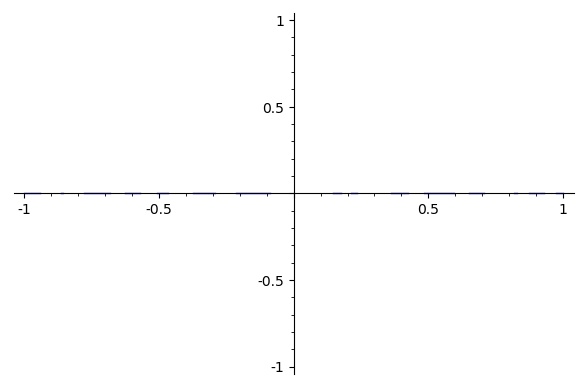

In [63]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_E[j])))
        print("")
    if not E_mode:
        plot(eq_rot_E[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()        

In [64]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_H[j])))
        print("")
    if E_mode:
        plot(eq_rot_H[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [65]:
if make_test_with_maxwell_equations:
    for j in range(3):
        print(eq_rot_rot_E[j])
        print("")

1/4*(kappa^2*rho^2*bessel_J(m + 2, kappa*rho) + kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 2*kappa^2*rho^2*bessel_J(m, kappa*rho) - 2*kappa*rho*bessel_J(m + 1, kappa*rho) + 2*kappa*rho*bessel_J(m - 1, kappa*rho) - 4*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(B_z_0*cos(k_0*zz) + A_z_0*sin(k_0*zz))*m*sin(m*phi)/(epsilon_0*kappa^2*rho^3) == 0

-1/8*(kappa^3*rho^3*bessel_J(m + 3, kappa*rho) + kappa^3*rho^3*bessel_J(m + 1, kappa*rho) - kappa^3*rho^3*bessel_J(m - 1, kappa*rho) - kappa^3*rho^3*bessel_J(m - 3, kappa*rho) - 2*kappa^2*rho^2*bessel_J(m + 2, kappa*rho) - 4*kappa*m^2*rho*bessel_J(m + 1, kappa*rho) + 4*kappa*m^2*rho*bessel_J(m - 1, kappa*rho) - 2*kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 4*kappa^2*rho^2*bessel_J(m, kappa*rho) - 4*kappa*rho*bessel_J(m + 1, kappa*rho) + 4*kappa*rho*bessel_J(m - 1, kappa*rho) - 16*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(B_z_0*cos(k_0*zz) + A_z_0*sin(k_0*zz))*cos(m*phi)/(epsilon_0*kappa^2*rho^3) == 0

True



In [66]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Ez = (eq_rot_rot_E[2])
        display(Math(latex(eq_rot_rot_Ez)))

In [67]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

In [68]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

In [69]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [70]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Erh = (eq_rot_rot_E[0])
        display(Math(latex(eq_rot_rot_Erh)))

<IPython.core.display.Math object>

In [71]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [72]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


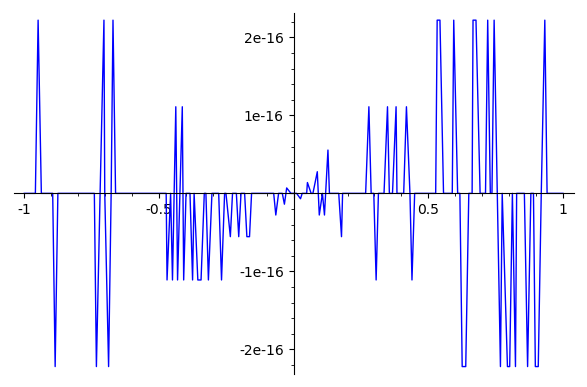

In [73]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [74]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Eph = (eq_rot_rot_E[1])
        display(Math(latex(eq_rot_rot_Eph)))

<IPython.core.display.Math object>

In [75]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [76]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


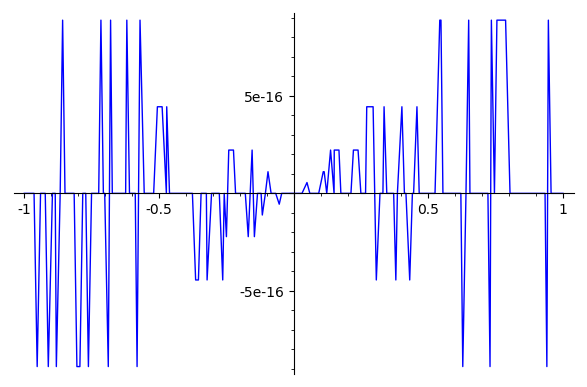

In [77]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [78]:
if make_test_with_maxwell_equations:
    display(Math(latex(eq_rot_rot_H)))

<IPython.core.display.Math object>

In [79]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hrh = (eq_rot_rot_H[0])
        display(Math(latex(eq_rot_rot_Hrh)))

In [80]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hph = (eq_rot_rot_H[1])
        display(Math(latex(eq_rot_rot_Hph)))

In [81]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hrh.lhs().operator())

In [82]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hph.lhs().operator())

In [83]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

In [84]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [85]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

In [86]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [87]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Hz = (eq_rot_rot_H[2])
        display(Math(latex(eq_rot_rot_Hz)))

<IPython.core.display.Math object>

In [88]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Hz.lhs().operator())

<function mul_vararg at 0x7fd209b41c20>


In [89]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

<IPython.core.display.Math object>

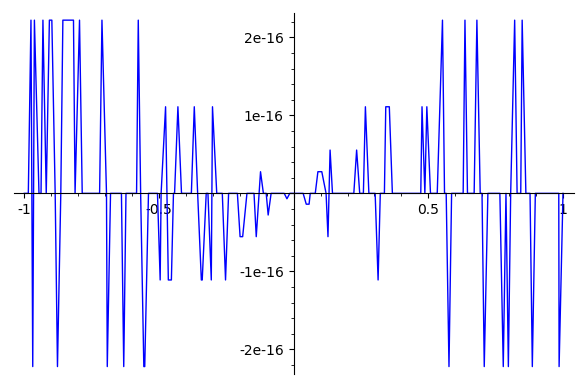

In [90]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [91]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda r,p,z, i=i: " + str(diff(E_z[i](r,p,z),p)/r - E_ph[i](r,p,z).diff(z)) +"]"))

In [92]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda r,p,z, i=i: " + str(E_rh[i](r,p,z).diff(z)-diff(E_z[i](r,p,z),rh)) +"]"))

In [93]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda r,p,z, i=i: " + str(((r*E_ph[i](r,p,z)).diff(r) - E_rh[i](r,p,z).diff(p))/r) +"]"))

In [94]:
rotE_ph[0](rh,ph,z)

(-I*A_z_0*k_0*cos(k_0*z) + I*B_z_0*k_0*sin(k_0*z))*m*mu_0*omega*bessel_J(m, kappa*rho)*sin(m*varphi)/(c*kappa^2*rho)

In [95]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [96]:
rotE_rh[0](rh,ph,z)

-1/2*(I*A_z_0*k_0*cos(k_0*z) - I*B_z_0*k_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)

In [97]:
rotE_z[0](rh,ph,z)

-1/4*((I*kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) + I*kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(B_z_0*cos(k_0*z) + A_z_0*sin(k_0*z))*mu_0*omega*rho*cos(m*varphi)/(c*kappa) - (2*I*B_z_0*cos(k_0*z) + 2*I*A_z_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa) + (-4*I*B_z_0*cos(k_0*z) - 4*I*A_z_0*sin(k_0*z))*m^2*mu_0*omega*bessel_J(m, kappa*rho)*cos(m*varphi)/(c*kappa^2*rho))/rho

In [98]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda r,p,z, i=i : rotE_rh[i](r,p,z)*c/(I*omega *mu[i])]

In [99]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda r,p,z, i=i : rotE_ph[i](r,p,z)*c/(I*omega *mu[i])]

In [100]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda r,p,z, i=i : rotE_z[i](r,p,z)*c/(I*omega *mu[i])]

In [101]:
H_rh_[0](rh,ph,z).factor()

-1/2*(A_z_0*cos(k_0*z) - B_z_0*sin(k_0*z))*k_0*(bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho))*cos(m*varphi)/kappa

In [102]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [103]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [104]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

0

In [105]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [106]:
H_z_[0](rh,ph,z)

1/4*I*((I*kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) + I*kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(B_z_0*cos(k_0*z) + A_z_0*sin(k_0*z))*mu_0*omega*rho*cos(m*varphi)/(c*kappa) - (2*I*B_z_0*cos(k_0*z) + 2*I*A_z_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa) + (-4*I*B_z_0*cos(k_0*z) - 4*I*A_z_0*sin(k_0*z))*m^2*mu_0*omega*bessel_J(m, kappa*rho)*cos(m*varphi)/(c*kappa^2*rho))*c/(mu_0*omega*rho)

In [107]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [108]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,h*n_layers) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,h*n_layers) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

if E_mode:
    var_begin = C_z[0]
    var_end   = C_z[n_layers - 1]
else:
    var_begin = B_z[0]
    var_end   = B_z[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [109]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda r, p, z, i=i : " + str(E_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [110]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda r, p, z, i=i : " + str(E_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [111]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda r, p, z, i=i : " + str(E_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [112]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda r, p, z, i=i : " + str(H_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [113]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda r, p, z, i=i : " + str(H_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [114]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda r, p, z, i=i : " + str(H_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [115]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [116]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [117]:
if 2 < n_layers:
    display(Math(latex(E_rh[2](rh,ph,z))))
    display(Math(latex(E_rho[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [118]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [119]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [120]:
if 2 < n_layers:
    display(Math(latex(E_z[2](rh,ph,z))))
    display(Math(latex(E_zz[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [121]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [122]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [123]:
if 2 < n_layers:
    display(Math(latex(H_rh[2](rh,ph,z))))
    display(Math(latex(H_rho[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [124]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [126]:
if 2 < n_layers:
    display(Math(latex(H_ph[2](rh,ph,z))))
    display(Math(latex(H_phi[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [127]:
if 0 < n_layers:
    display(Math(latex(H_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

In [128]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [129]:
if 2 < n_layers:
    display(Math(latex(H_zz[2](rh,ph,z))))

<IPython.core.display.Math object>

In [130]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [131]:
all_vars = []
if E_mode:
    for i in range(n_layers):
        all_vars += [C_z[i], D_z[i]]
else:
    for i in range(n_layers):
        all_vars += [A_z[i], B_z[i]]
all_vars

[A_z_0, B_z_0, A_z_1, B_z_1, A_z_2, B_z_2]

In [132]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [133]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [134]:
bch = []
bc =  []
for i  in range (n_layers-1):
    if E_mode:
        bc += [(E_rho[i](rh,ph, (i + 1) * h) == E_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(E_phi[i](rh,ph, (i + 1) * h) == E_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(epsilon[i] * E_z[i](rh,ph,(i+1)*h) == epsilon[i+1]*E_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,(i+1)*h) == H_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, (i + 1) * h) == H_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, (i + 1) * h) == H_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph,(i+1)*h) == mu[i+1]*H_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph,(i+1)*h) == E_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

In [135]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [136]:
bch

[1/2*I*A_z_0*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h*k_0)/(c*kappa) == -1/2*(-I*B_z_1*cos(h*k_1) - I*A_z_1*sin(h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa),
 -1/2*(-I*B_z_1*cos(2*h*k_1) - I*A_z_1*sin(2*h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa) == -1/2*(I*A_z_2*cos(2*h*k_2)*sin(3*h*k_2)/cos(3*h*k_2) - I*A_z_2*sin(2*h*k_2))*mu_2*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [137]:
all_eqs = bc \
        + boundary_conductor

#display(Math(latex(all_eqs)))

In [138]:
M = GenerateMatrix(all_eqs, all_vars)

In [139]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [140]:
M.nrows(), M.ncols(), len(all_vars)

(8, 6, 6)

In [141]:
M.rank()

6

In [142]:
reduced_M = reduceDependedRows(M)


M.nrows() 8
M.ncols() 6
M.rank() 6
M.pivot_rows() = (0, 2, 3, 5, 6, 7)


In [143]:
reduced_M.nrows(), reduced_M.ncols(),

(6, 6)

In [144]:
reduced_M.pivots()

(0, 1, 2, 3, 4, 5)

In [145]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [146]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 6
M.ncols() 6
M.rank() 6
len(vars) 6
M.pivots() = (0, 1, 2, 3, 4, 5)


In [147]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(6, 6, 6)

In [148]:
reduced_vars

[A_z_0, B_z_0, A_z_1, B_z_1, A_z_2, B_z_2]

In [149]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [150]:
reduced_reduced_M

[                                            -1/2*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*cos(m*varphi)/kappa                                                                                                                                             0                                              1/2*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_1)*cos(m*varphi)/kappa                                             -1/2*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h*k_1)/kappa                                                                                                                                             0                                                                                                                                             0]
[                                                                                         mu_0*bessel_J(m, kappa*rho)*cos(m*varphi)*sin(h*k_0)    

In [151]:
type(reduced_reduced_M)

<class 'sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense'>

In [152]:
reduced_reduced_M.det()

-1/4*k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 + 1/2*k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 - 1/4*k_1*k_2*mu_0*mu_1*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 - 1/4*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 + 1/2*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 - 1/4*k_0*k_2*mu_1^2*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m

In [153]:
exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [154]:
display(Math(latex(reduced_reduced_M_det)))

<IPython.core.display.Math object>

In [155]:
reduced_reduced_M_det

-1/4*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 + 1/2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 - 1/4*k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 - 1/4*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 + 1/2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 - 1/4*k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m

In [156]:
M_det  = reduced_reduced_M_det

In [157]:
M_det

-1/4*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 + 1/2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 - 1/4*k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)/kappa^2 - 1/4*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 + 1/2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 - 1/4*k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m

In [158]:
# display(Math(latex(M_det)))

In [159]:
M_det_num = M_det.numerator()

In [160]:
M_det_num

-k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0) + 2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0) - k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0) - k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1) + 2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1) - k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1) + k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bess

In [161]:
M_det_num.variables()

(h, k_0, k_1, k_2, kappa, m, mu_0, mu_1, mu_2, rho, varphi)

In [162]:
M_det.full_simplify().numerator()

(k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_1)*cos(h*k_2)*sin(h*k_0) - 2*k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_1)*cos(h*k_2)*sin(h*k_0) + k_1*k_2*mu_0*mu_1*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_1)*cos(h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_2)*sin(h*k_1) - 2*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_2)*sin(h*k_1) + k_0*k_2*mu_1^2*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_2)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*sin(h*k_2) - 2*k_0*k_1*mu_1*mu_2*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*sin(h*k_2) + k_0*k_1*mu_1*mu_2*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2

In [163]:
M_det_num_expand = M_det_num.expand()

In [164]:
M_det_num_expand.operator()

<function add_vararg at 0x7fd20afb2f80>

In [165]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

-k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)

2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)

-k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0)

-k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)

2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)

-k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1)

k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_

In [166]:
M_det_num

-k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0) + 2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0) - k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(h*k_0) - k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1) + 2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1) - k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*cos(m*varphi)^4*sin(2*h*k_1) + k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bess

In [167]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

-(k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1

In [168]:
M_det_num_factor.operator()

<function mul_vararg at 0x7fd209b41c20>

In [169]:
M_det_num_factor.operands()

[k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [170]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
    print ("")
    
M_det_num_factor_operands

k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*

(k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [171]:
M_det_num_factor_operands

(k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [172]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [173]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [174]:
M_det_num.variables()

(h, k_0, k_1, k_2, mu_0, mu_1, mu_2)

In [175]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h*k[i]))).full_simplify().expand()

In [176]:
M_det_num

k_1*mu_0*mu_2/(k_0*k_2) - mu_1*mu_2*cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) - mu_1^2*cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) - mu_0*mu_1*cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2))

In [177]:
disp_eq = M_det_num == 0

In [178]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [179]:
bch

[1/2*I*A_z_0*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h*k_0)/(c*kappa) == -1/2*(-I*B_z_1*cos(h*k_1) - I*A_z_1*sin(h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa),
 -1/2*(-I*B_z_1*cos(2*h*k_1) - I*A_z_1*sin(2*h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa) == -1/2*(I*A_z_2*cos(2*h*k_2)*sin(3*h*k_2)/cos(3*h*k_2) - I*A_z_2*sin(2*h*k_2))*mu_2*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [180]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [181]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch[i].subs(solve (bc[0], C_z[1])), D_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch[i].subs(solve (bc[0], B_z[1])), A_z[i+1])[0].full_simplify ().factor () ]
bchs.reverse()

In [182]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [183]:
bcs = []
for i in range(n_layers-1):
    if E_mode:
        bcs +=  solve (bc[3*i], C_z[i+1])
    else:
        bcs +=  solve (bc[3*i], B_z[i+1])
bcs

[B_z_1 == -(A_z_0*k_0*cos(h*k_0) - A_z_1*k_1*cos(h*k_1))/(k_1*sin(h*k_1))]

In [184]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda r, p, z, i=i : E_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs) ]

In [185]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda r, p, z, i=i : E_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs) ]

In [186]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda r, p, z, i=i : E_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs) ]

In [187]:
H_rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda r, p, z, i=i : H_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs) ]

In [188]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda r, p, z, i=i : H_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs) ]

In [189]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda r, p, z, i=i : H_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs) ]

In [190]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [191]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [192]:
if 2 < n_layers:
    display(Math(latex(E_rho_s [2](rh,ph,z))))

<IPython.core.display.Math object>

In [193]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [194]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [195]:
if 2 < n_layers:
    display(Math(latex(E_phi_s [2](rh,ph,z))))

<IPython.core.display.Math object>

In [196]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [197]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [198]:
if 2 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[2](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[2](rh,ph,z))))

<IPython.core.display.Math object>

In [199]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [200]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [201]:
if 2 < n_layers:
    display(Math(latex(H_rho_s[2](rh,ph,z))))

<IPython.core.display.Math object>

In [202]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [203]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [204]:
if 2 < n_layers:
    display(Math(latex(H_phi_s[2](rh,ph,z))))

<IPython.core.display.Math object>

In [205]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2,
 -k_2^2 + epsilon_2*mu_2*omega^2/c^2 == kappa^2]

In [206]:
disp_eq

k_1*mu_0*mu_2/(k_0*k_2) - mu_1*mu_2*cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) - mu_1^2*cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) - mu_0*mu_1*cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2)) == 0

In [207]:
if E_mode:
    bessel_root_1 = first_bessel_roots[n_val]
else:
    bessel_root_1 = first_bessel_d_roots[n_val]

bessel_root_1

1.8411837813406593

In [208]:
kappa_d1 = bessel_root_1/a

In [209]:
#sgs
# https://iopscience.iop.org/article/10.1149/1.2113993/pdf
# DC and ac electrical conductivities of silicon dioxide thermally grown on p‐ (boron‐doped) and n‐type (phosphorous‐doped) silicon have been measured in the temperature range of 25°–1100°C. 
# Total dc conductivities varied from 10−9 to 10−16 Ω−1cm−1
# sigma_sgse = 9*10^9 * sigma_SI

# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == a_val, mu[0] == 1,  epsilon[0] == 2.468^2, sigma[0] == 9*10^9 * 10 ^-9]
if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.67^2, sigma[1] == 9*10^9 * 10 ^-9]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[1] == 1, epsilon[1] == 1.487^2, sigma[1] == 9*10^9 * 10 ^-9]
    
if 2 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[2] == 1, epsilon[2] == 1.487^2, sigma[2] == 9*10^9 * 10 ^-9]

if 3 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[3] == 1, epsilon[3] == 1.487^2, sigma[3] == 9*10^9 * 10 ^-9]
    
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
print(omega_value[0].rhs().n())

2.98046134067856e15


In [210]:
epsilon_d = []
mu_d = []

for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(digit_values)]
    mu_d      += [mu[i].subs(digit_values)]

In [211]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [212]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.02354137303244367,
 2.21435767505208e9*pi^2 - k_1^2 == 0.02354137303244367,
 2.21435767505208e9*pi^2 - k_2^2 == 0.02354137303244367]

In [213]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [214]:
disp_eq_d

k_1/(k_0*k_2) - cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) - cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) - cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2)) == 0

In [215]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [216]:
k_values

[k_0 == 1/13*sqrt(2061735010415/2*pi^2 - 966824495/243012801),
 k_1 == sqrt(2721445582639/1229*pi^2 - 5720855/243012801),
 k_2 == sqrt(2721445582639/1229*pi^2 - 5720855/243012801)]

In [217]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [218]:
k_values_d

[k_0 == 245362.362944877, k_1 == 147833.806198908, k_2 == 147833.806198908]

In [219]:
disp_eq_d

k_1/(k_0*k_2) - cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) - cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) - cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2)) == 0

In [220]:
disp_eq_s = disp_eq_d.subs(k_values_d).subs(kappa == kappa_d1)

In [221]:
disp_eq_s

-(4.07560470154366e-6)*cos(147833.806198908*h)^2/sin(147833.806198908*h)^2 - 0.0000135287053173009*cos(245362.362944877*h)*cos(147833.806198908*h)/(sin(245362.362944877*h)*sin(147833.806198908*h)) + 4.07560470154366e-6 == 0

In [222]:
disp_eq_brakes = [0]
disp_eq_s_operands = ()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    print (operand.denominator())
    # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
    operand_denominator_roots = find_root_recursive(operand.denominator(), lambda_d/32, lambda_d)
    operand_denominator_roots.sort()
    print(operand_denominator_roots)
    disp_eq_brakes += operand_denominator_roots
    #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
    #    M_det_num_factor_operands += (operand,)
    print ("")
disp_eq_brakes.sort()

-(4.07560470154366e-6)*cos(147833.806198908*h)^2/sin(147833.806198908*h)^2
(h,)
sin(147833.806198908*h)^2
[]

-0.0000135287053173009*cos(245362.362944877*h)*cos(147833.806198908*h)/(sin(245362.362944877*h)*sin(147833.806198908*h))
(h,)
sin(245362.362944877*h)*sin(147833.806198908*h)
[1.2803889977921318e-05, 2.125084081419074e-05, 2.560777957896176e-05, 3.841166936791445e-05, 4.2501681237190165e-05, 5.121555920534207e-05]

4.07560470154366e-6
()
1
[]



In [223]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [224]:
disp_eq_brakes

[0,
 1.2803889977921318e-05,
 2.125084081419074e-05,
 2.560777957896176e-05,
 3.841166936791445e-05,
 4.2501681237190165e-05,
 5.121555920534207e-05]

In [225]:
disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

-0.000556740480513405

In [226]:
disp_eq_s.lhs()

-(4.07560470154366e-6)*cos(147833.806198908*h)^2/sin(147833.806198908*h)^2 - 0.0000135287053173009*cos(245362.362944877*h)*cos(147833.806198908*h)/(sin(245362.362944877*h)*sin(147833.806198908*h)) + 4.07560470154366e-6

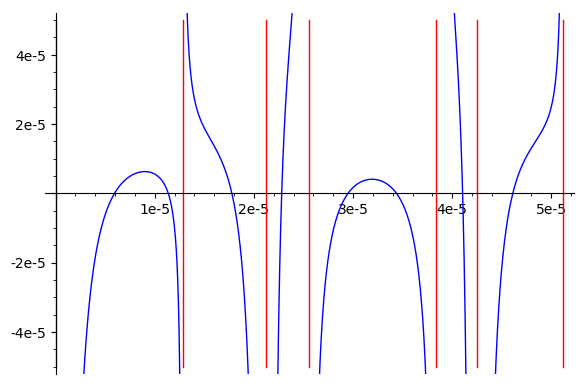

In [227]:
plt = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
plt += plot(disp_eq_s.lhs(), xeps, disp_eq_brakes[0])
for i in range(len(disp_eq_brakes)-1):
    plt += plot (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)
for i in range(len(disp_eq_brakes)):
    plt += line ( [(disp_eq_brakes[i],-ylim), (disp_eq_brakes[i],ylim)], color = 'red')

plt.show()

In [228]:
xeps  = lambda_d / 1024
h_lst_rec = find_root_recursive(disp_eq_s.lhs(), xeps, disp_eq_brakes[len(disp_eq_brakes)-1])
h_lst_rec.sort()
h_lst_rec

[5.941813221591787e-06,
 1.777986229312757e-05,
 2.9494947972225623e-05,
 4.1053654867810446e-05]

In [229]:
h_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
        h_lst += find_root_recursive (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
h_lst.sort()

In [230]:
h_lst 

[5.941813128312345e-06,
 1.1364572261265539e-05,
 1.7779862530851447e-05,
 2.2805165674324695e-05,
 2.9494947957829444e-05,
 3.438279137258788e-05,
 4.105365492067722e-05,
 4.611589668733681e-05]

In [231]:
def find_newton_root(f,x,a,b):
    df = f.diff(x)
    NewtonIt(x)=x-(f/df)(x)
    
    xn=(a+b)/2;                      # initial guess

    #print (xn)
    for i in range(10):
        xn=N(NewtonIt(xn),digits=20)

        
        #print (xn)

    return xn

In [232]:
h_lst_newton = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        h_lst_newton += [find_newton_root (disp_eq_s.lhs(),h,disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
        pass

h_lst_newton.sort()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [233]:
h_lst

[5.941813128312345e-06,
 1.1364572261265539e-05,
 1.7779862530851447e-05,
 2.2805165674324695e-05,
 2.9494947957829444e-05,
 3.438279137258788e-05,
 4.105365492067722e-05,
 4.611589668733681e-05]

In [234]:
h_lst_newton

[5.9418132246095453649e-6,
 0.000017779862296220982676,
 0.000022805165574521428875,
 0.000041053655021545434856,
 0.000046115896816250312158,
 0.000081673718937315877985]

In [235]:
h_sol = h_lst[h_val]

In [236]:
h_sol, h_val

(5.941813128312345e-06, 0)

In [237]:
a0 = var("a0")
if E_mode:
    amplitude_variable = D_z[0]
else:
    amplitude_variable = A_z[0]

In [238]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda r,p,z, a0, i=i: E_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [239]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda r,p,z, a0, i=i: E_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [240]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda r,p,z, a0, i=i: E_z_s[i](r,p,z)
                .subs(digit_values)
                .subs(h == h_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
               ]

In [241]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda r,p,z, a0, i=i: H_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [242]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda r,p,z, a0, i=i: H_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [243]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda r,p,z, a0, i=i: H_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [244]:
display(Math(latex(E_rho_s [1](rho,ph,z))))

<IPython.core.display.Math object>

In [245]:
[E_rho_s [0](rho,ph,z,1) for rho in [1..int(a_val)]]

[m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*A_z_0*sin(k_1*z)/(k_1*mu_1) + I*(A_z_0*k_0*cos(h*k_0) - (k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*A_z_0*cos(h*k_1)/mu_1)*cos(k_1*z)/(k_1*sin(h*k_1)))*bessel_J(m, kappa)*sin(m*varphi)/(c*kappa^2),
 1/2*m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*A_z_0*sin(k_1*z)/(k_1*mu_1) + I*(A_z_0*k_0*cos(h*k_0) - (k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*A_z_0*cos(h*k_1)/mu_1)*cos(k_1*z)/(k_1*sin(h*k_1)))*bessel_J(m, 2*kappa)*sin(m*varphi)/(c*kappa^2),
 1/3*m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*A_z_0*sin(k_1*z)/(k_1*mu_1) + I*(A_z_0*k_0*cos(h*k_0) - (k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*A_z_0*cos(h*k_1)/mu_1)*cos(k_1*z)/(k_1*sin(h*k_1)))*bessel_J(m, 3*kappa)*sin(m*varphi)/(c*kappa^2),
 1/4*m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*

In [246]:
if E_mode:
    print([E_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

In [247]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

[477510.808243192*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 464855.931014727*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 444039.918456369*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 415469.997544814*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 379704.520901773*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 337441.500669436*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 289504.286288197*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),
 236824.688639642*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*cos(varphi),


In [248]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

[-480340.554319705*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -476108.413479956*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -469110.087136875*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -459427.586117347*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -447174.036472096*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -432492.023730739*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -415551.511086641*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(varphi),
 -396547.365619378*(0.884185241502176*a0*cos(147833.806198908*z) - 0.490394588681544*a0*sin(147833.806198908*z))*sin(v

In [249]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

[0.07649046224674987*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.1516330540869121*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.2241062955460767*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.2926409449711769*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.35604477330608436*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.4132257563808972*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.46321321027659135*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*cos(varphi), 0.5051764382778934*(0.490394588681544*a0*cos(147833.806198908*z) + 0.884185241502176*a0*sin(147833.806198908*z))*c

In [250]:
digit_values

[m == 1,
 a == 12,
 mu_0 == 1,
 epsilon_0 == 6.09102400000000,
 sigma_0 == 9,
 mu_1 == 1,
 epsilon_1 == 2.21116900000000,
 sigma_1 == 9,
 mu_2 == 1,
 epsilon_2 == 2.21116900000000,
 sigma_2 == 9]

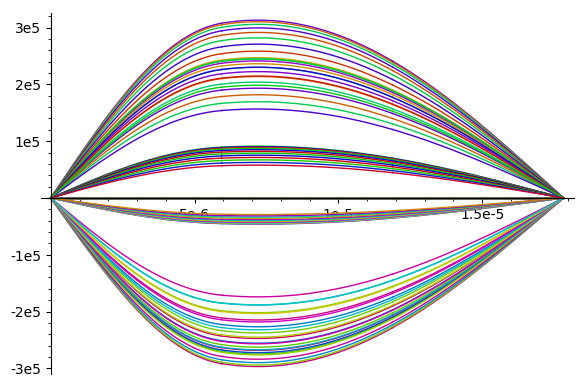

In [251]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
plt.show ()

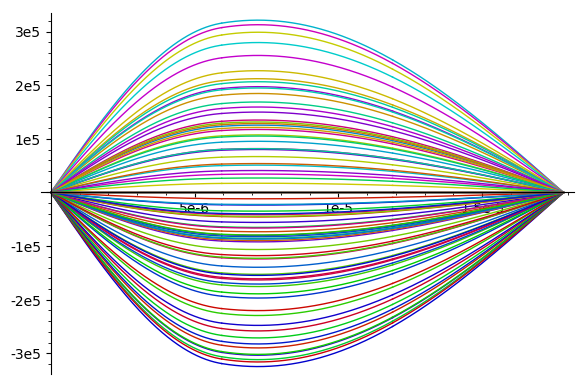

In [252]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
plt.show ()

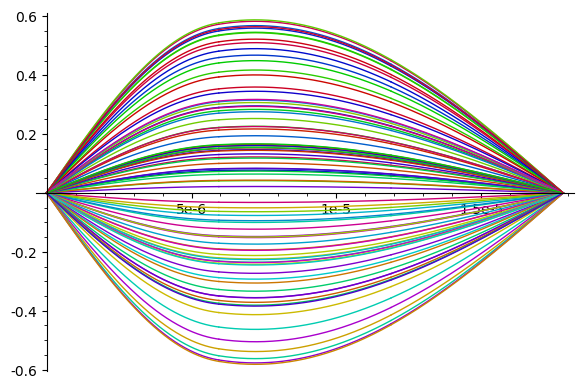

In [253]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        plt += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
plt.show ()

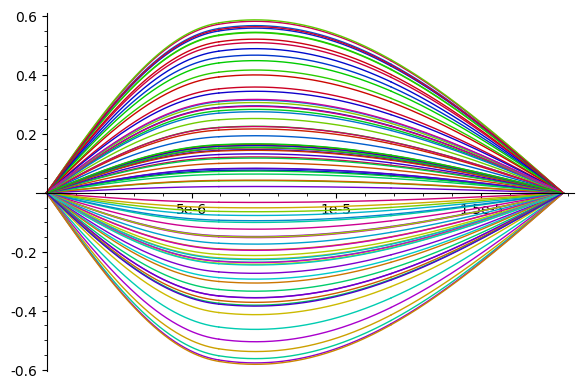

In [254]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        plt += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
plt.show ()

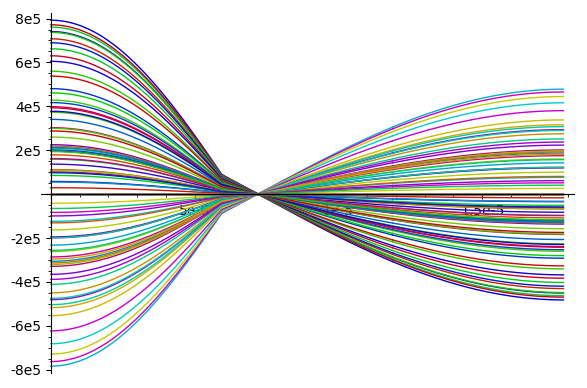

In [255]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
plt.show ()

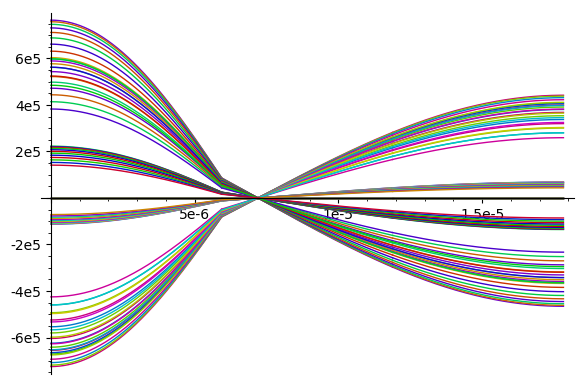

In [256]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
plt.show ()

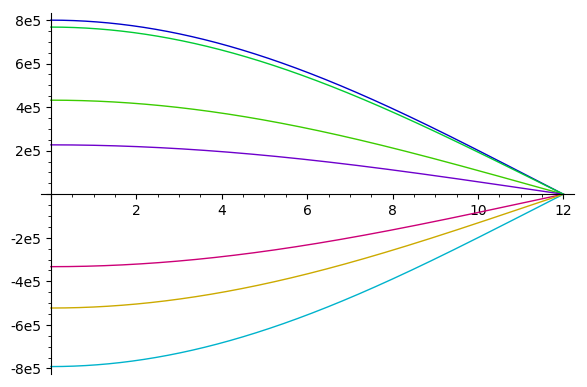

In [257]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

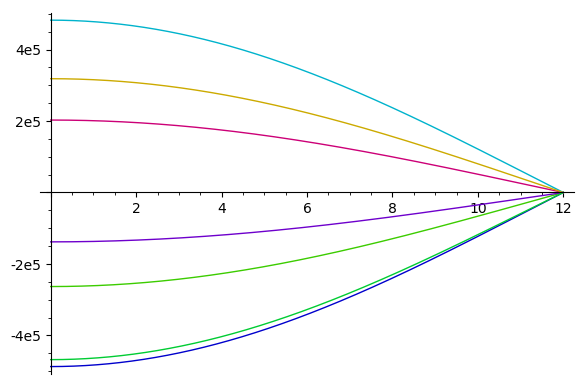

In [258]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

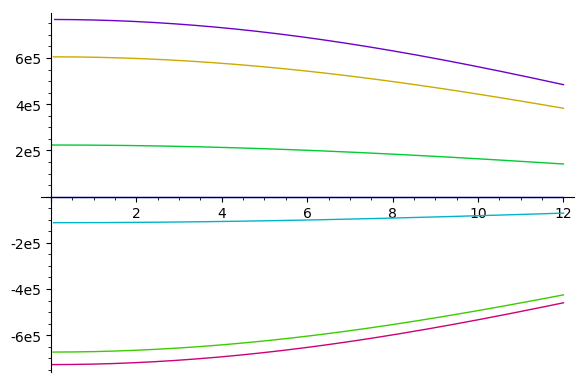

In [259]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

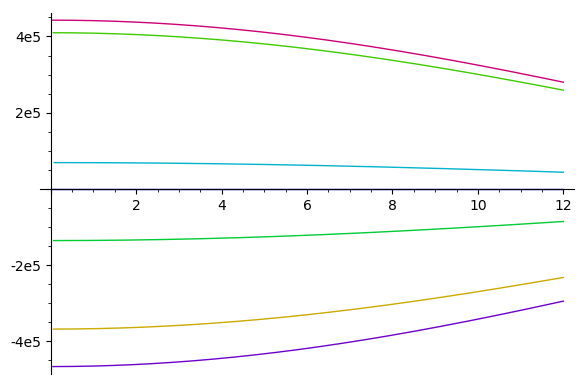

In [260]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

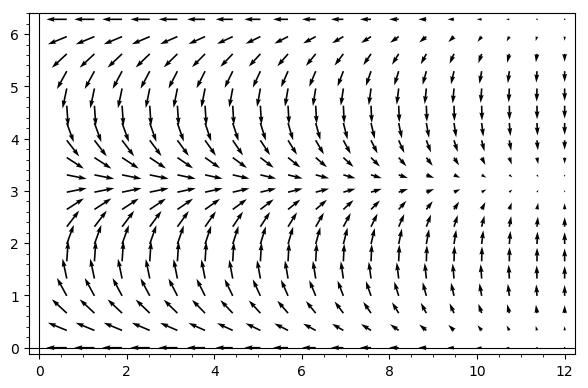

In [261]:
if E_mode:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).imag_part(),
                       H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).imag_part()),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()
else:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1),
                       H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1)),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()

In [262]:
if E_mode:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,n_layers * h_sol,1).imag_part(),
        H_phi_sol[n_layers - 1](rho,phi,n_layers * h_sol,1).imag_part(),
        name='H1')

    print(H1.display())
    #H1.plot()
else:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,n_layers * h_sol,1),
        H_phi_sol[n_layers - 1](rho,phi,n_layers * h_sol,1),
        name='H1')

    print(H1.display())
    #H1.plot()


H1 = 487091.761464845*(bessel_J(2, 0.15343198177838827*rho) - bessel_J(0, 0.15343198177838827*rho))*cos(phi) e_rho + 6.34928592877570e6*bessel_J(1, 0.15343198177838827*rho)*sin(phi)/rho e_phi


In [263]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate
    
    #try:
    #    print ("integrand = ", get_integrand_view(f))
    #except Exception as ex1:
    #    print ("Exception ex1 = ", ex1)
    #print ("a, b = ", a, b)
    
    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        #print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a, b = ", a, b)

        import inspect
        stack = inspect.stack()
        for frame in stack:
            func_name = frame[3]
            print ("func_name = ", func_name)
            #if ('get_integrand_view' == func_name):
                #to_call_integration = False
                #break;

        
        raise ex

In [264]:
E2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho[i](r, p, z))^2 +
           Im(E_rho[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [265]:
E2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi[i](r, p, z))^2 +
           Im(E_phi[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [266]:
E2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [267]:
E2_8pi_rho[0](r,p,z)

1/16*A_z_0^2*m^2*mu_0^2*omega^2*real_part(bessel_J(m, kappa*r))^2*sin(m*p)^2*sin(k_0*z)^2/(pi*c^2*kappa^4*r^2)

In [268]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho_s[i](r, p, z))^2 +
           Im(E_rho_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [269]:
E2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi_s[i](r, p, z))^2 +
           Im(E_phi_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [270]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [271]:
E2_8pi_rho_s[0](r,p,z)

1/16*A_z_0^2*m^2*mu_0^2*omega^2*real_part(bessel_J(m, kappa*r))^2*sin(m*p)^2*sin(k_0*z)^2/(pi*c^2*kappa^4*r^2)

In [272]:
E2_8pi_phi_s[0](rh,ph,z)

1/64*(A_z_0*mu_0*omega*cos(m*varphi)*real_part(bessel_J(m + 1, kappa*rho))*sin(k_0*z)/(c*kappa) - A_z_0*mu_0*omega*cos(m*varphi)*real_part(bessel_J(m - 1, kappa*rho))*sin(k_0*z)/(c*kappa))^2/pi

In [273]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

In [274]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda r,p,z, a0, i=i: E2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [275]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda r,p,z, a0, i=i: E2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [276]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda r,p,z, a0, i=i: E2_8pi_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [277]:
E2_8pi_rho_sol[0](r,p,z, a0)

112938567224.13544*pi*a0^2*real_part(bessel_J(1, 0.15343198177838827*r))^2*sin(p)^2*sin(245362.362944877*z)^2/r^2

In [278]:
E2_8pi_phi_sol[0](r,p,z, a0)

87769060423517347656250000000000/6241*((2.174019336333283e-10)*pi*a0*cos(p)*real_part(bessel_J(2, 0.15343198177838827*r))*sin(245362.362944877*z) - (2.174019336333283e-10)*pi*a0*cos(p)*real_part(bessel_J(0, 0.15343198177838827*r))*sin(245362.362944877*z))^2/pi

In [279]:
E2_8pi_z_sol[0](r,p,z, a0)

0

In [280]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

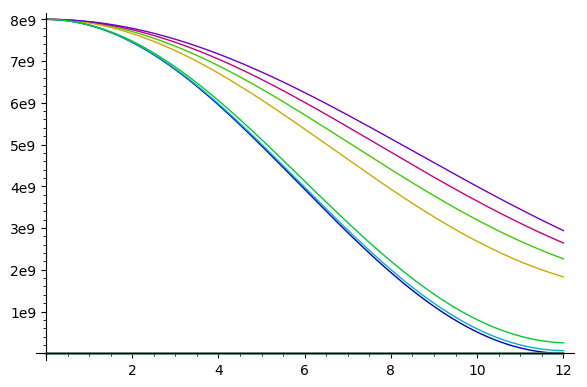

In [281]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
                (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
                 E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

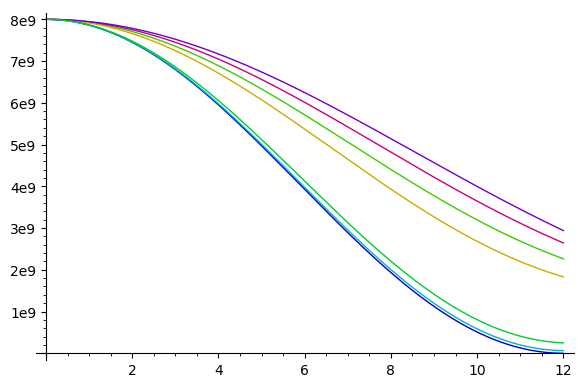

In [282]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [283]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_rho_sol[i](r,p,z, a0) * r]

In [284]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_phi_sol[i](r,p,z, a0) * r]

In [285]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_z_sol[i](r,p,z, a0) * r]

In [286]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

112938567224.13544*pi*real_part(bessel_J(1, 0.15343198177838827*rho))^2*sin(varphi)^2*sin(245362.362944877*z)^2/rho

In [287]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

87769060423517347656250000000000/6241*((2.174019336333283e-10)*pi*cos(varphi)*real_part(bessel_J(2, 0.15343198177838827*rho))*sin(245362.362944877*z) - (2.174019336333283e-10)*pi*cos(varphi)*real_part(bessel_J(0, 0.15343198177838827*rho))*sin(245362.362944877*z))^2*rho/pi

In [288]:
print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

0


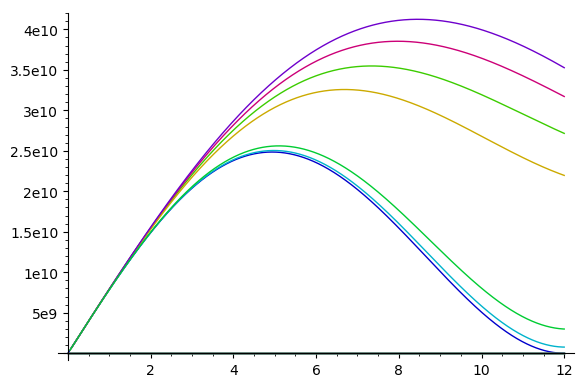

In [289]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
                (E2_8pi_rho_sol_rh[i](rh,ph,(i+1)*h_sol,1) + 
                 E2_8pi_phi_sol_rh[i](rh,ph,(i+1)*h_sol,1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

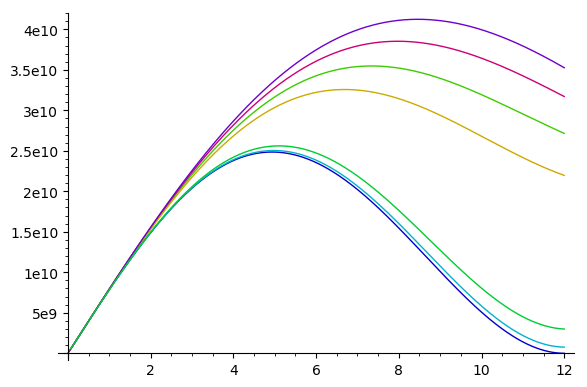

In [290]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [291]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [292]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [293]:
E2_8pi_rho_sol_rh[1](r,p,z, a0)

351076241694069390625000000000000/6241*((6.94853384457198e-10)*pi*a0*cos(147833.806198908*z)*real_part(bessel_J(1, 0.15343198177838827*r))*sin(p)/r + (1.25282603382042e-9)*pi*a0*real_part(bessel_J(1, 0.15343198177838827*r))*sin(p)*sin(147833.806198908*z)/r)^2*r/pi

In [294]:
if 1 < n_layers:
    print([E2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[3949906620.5762963, 7761220581.467362, 11302099246.449297, 14453813526.161158, 17116362786.133825, 19213026152.23055, 20693601930.66761, 21536168670.73221, 21747292857.46785, 21360703264.144596, 20434544371.590805, 19047404973.33656]


In [295]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [296]:
[E2_8pi_phi_sol_rh_int_ph [0](r,h_sol, 1) for r in [1..int(a_val)]]

[6363222269.466627,
 12060836493.835466,
 16507296974.924755,
 19268593180.551533,
 20117417166.048077,
 19065970614.930374,
 16372640184.400154,
 12521449847.472397,
 8176008897.414979,
 4112333933.7255573,
 1137165699.3009915,
 0.0]

In [297]:
if 1 < n_layers:
    print([E2_8pi_phi_sol_rh_int_ph [1](rho,h_sol, 1) for rho in [1..int(a_val)]])

[6363222269.466624, 12060836493.83546, 16507296974.92475, 19268593180.551525, 20117417166.048077, 19065970614.930363, 16372640184.400154, 12521449847.472391, 8176008897.414976, 4112333933.725555, 1137165699.300991, 0.0]


In [298]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [299]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]])

In [300]:
if E_mode:
    if 1 < n_layers:
        print([E2_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

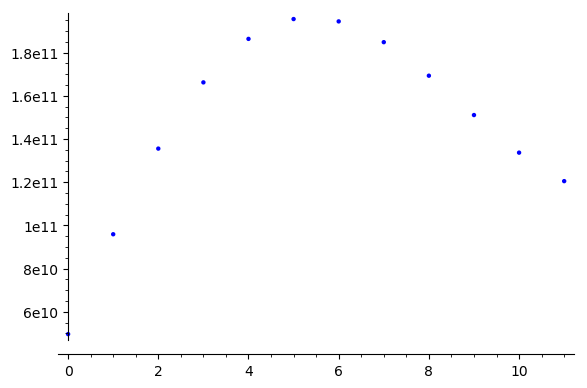

In [301]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) ) for i in range(n_layers - 1)])
            for rho in [1..int(a_val)] ])
plt.show ()

In [302]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [303]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [304]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [305]:
f_dielectric_surf_rho = []
for i in range(n_layers - 1):
    f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [306]:
f_dielectric_surf_phi = []
for i in range(n_layers - 1):
    f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [307]:
f_dielectric_surf_z = []
for i in range(n_layers - 1):
    epsilon_d[i]*E_z_sol[i](rh,ph,z,1)
    f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1])*E2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i+1]/epsilon_d[i])*E2_8pi_z_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [308]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol, 1))

In [309]:
if E_mode:
    if 1 < n_layers:
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol, 1))
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1))

In [310]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [311]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [312]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [313]:
H2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho[i](r, p, z))^2 +
           Im(H_rho[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [314]:
H2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi[i](r, p, z))^2 +
           Im(H_phi[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [315]:
H2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z[i](r, p, z))^2 +
           Im(H_z[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [316]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho_s[i](r, p, z))^2 +
           Im(H_rho_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [317]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi_s[i](r, p, z))^2 +
           Im(H_phi_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [318]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z_s[i](r, p, z))^2 +
           Im(H_z_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [319]:
H2_8pi_rho_s[0](rh,ph,z)

1/64*(A_z_0*k_0*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/kappa - A_z_0*k_0*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/kappa)^2/pi

In [320]:
H2_8pi_phi_s[0](rh,ph,z)

1/16*A_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*kappa^4*rho^2)

In [321]:
H2_8pi_z_s[0](rh,ph,z)

1/16*A_z_0^2*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2*sin(k_0*z)^2/pi

In [322]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda r,p,z, a0, i=i: H2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [323]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda r,p,z, a0, i=i: H2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [324]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda r,p,z, a0, i=i: H2_8pi_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [325]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

1/64*(1.59916048858229e6*a0*bessel_J(2, 0.15343198177838827*rho)*cos(varphi)*cos(245362.362944877*z) - 1.59916048858229e6*a0*bessel_J(0, 0.15343198177838827*rho)*cos(varphi)*cos(245362.362944877*z))^2/pi

In [326]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

6.78941459977285e12*a0^2*bessel_J(1, 0.15343198177838827*rho)^2*cos(245362.362944877*z)^2*sin(varphi)^2/(pi*rho^2)

In [327]:
H2_8pi_z_sol[0](rh,ph,z, a0)

1/16*a0^2*bessel_J(1, 0.15343198177838827*rho)^2*cos(varphi)^2*sin(245362.362944877*z)^2/pi

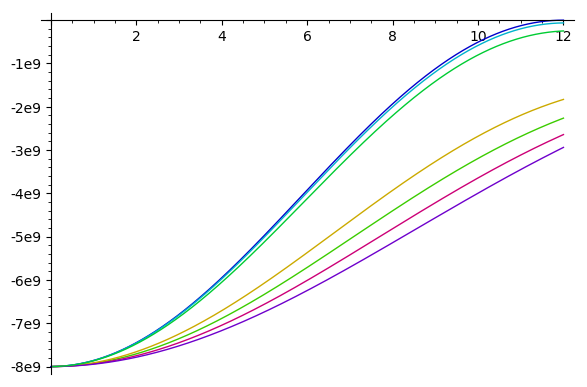

In [328]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) ))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

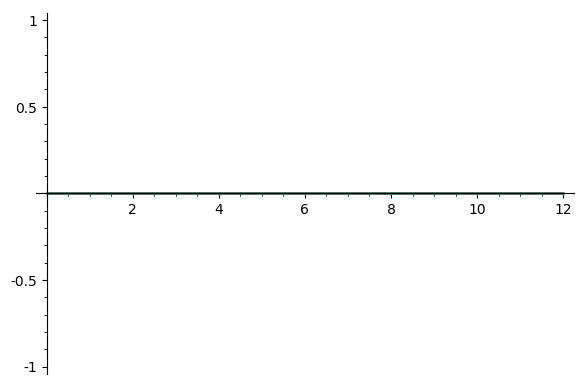

In [329]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(1.0-epsilon[0]).subs(digit_values) * 
            (E2_8pi_rho_sol[0](rh,ph,(0)*h_sol,1) + 
             E2_8pi_phi_sol[0](rh,ph,(0)*h_sol,1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))

plt += plot ([(epsilon[n_layers - 1] - 1.0).subs(digit_values) * 
            (E2_8pi_rho_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             E2_8pi_phi_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

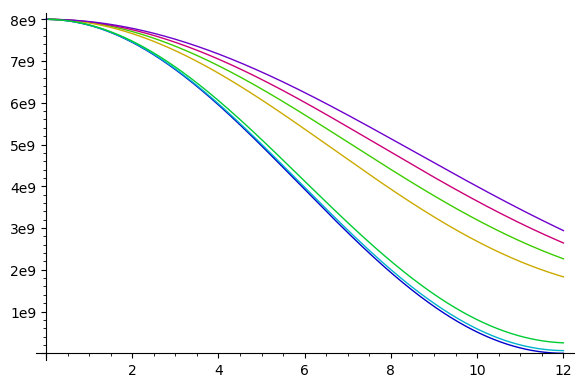

In [330]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

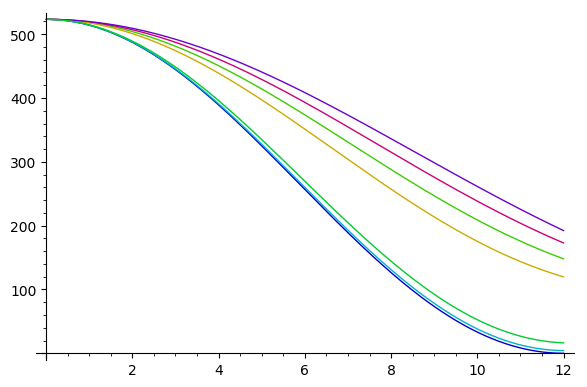

In [331]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [332]:
[
((H2_8pi_rho[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
 H2_8pi_phi[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
 H2_8pi_z  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
-
(H2_8pi_rho[0](rh,ph,0,1) + 
 H2_8pi_phi[0](rh,ph,0,1) +
 H2_8pi_z  [0](rh,ph,0,1) )
+
sum([(epsilon[i]-epsilon[i+1]) * 
(E2_8pi_rho[i](rh,ph,(i+1)*h_sol,1) + 
 E2_8pi_phi[i](rh,ph,(i+1)*h_sol,1) )
for i in range(n_layers - 1)]))]

[-1/16*B_z_0^2*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2/pi - 1/16*A_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rho)^2*sin(m*varphi)^2/(pi*kappa^4*rho^2) + 1/64*(4*A_z_0^2*m^2*mu_0^2*omega^2*real_part(bessel_J(m, kappa*rho))^2*sin(m*varphi)^2*sin((5.941813128312345e-06)*k_0)^2/(pi*c^2*kappa^4*rho^2) + (A_z_0*mu_0*omega*cos(m*varphi)*real_part(bessel_J(m + 1, kappa*rho))*sin((5.941813128312345e-06)*k_0)/(c*kappa) - A_z_0*mu_0*omega*cos(m*varphi)*real_part(bessel_J(m - 1, kappa*rho))*sin((5.941813128312345e-06)*k_0)/(c*kappa))^2/pi)*(epsilon_0 - epsilon_1) + 1/64*((B_z_1*mu_1*omega*cos(m*varphi)*cos((1.188362625662469e-05)*k_1)*real_part(bessel_J(m + 1, kappa*rho))/(c*kappa) - B_z_1*mu_1*omega*cos(m*varphi)*cos((1.188362625662469e-05)*k_1)*real_part(bessel_J(m - 1, kappa*rho))/(c*kappa) + A_z_1*mu_1*omega*cos(m*varphi)*real_part(bessel_J(m + 1, kappa*rho))*sin((1.188362625662469e-05)*k_1)/(c*kappa) - A_z_1*mu_1*omega*cos(m*varphi)*real_part(bessel_J(m - 1, kappa*rho))*sin((1.188362625662469e-05)*k

In [333]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_rho_sol[i](r,p,z, a0) * r]

In [334]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_phi_sol[i](r,p,z, a0) * r]

In [335]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_z_sol[i](r,p,z, a0) * r]

In [336]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

1/64*(1.59916048858229e6*bessel_J(2, 0.15343198177838827*rho)*cos(varphi)*cos(245362.362944877*z) - 1.59916048858229e6*bessel_J(0, 0.15343198177838827*rho)*cos(varphi)*cos(245362.362944877*z))^2*rho/pi

In [337]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

6.78941459977285e12*bessel_J(1, 0.15343198177838827*rho)^2*cos(245362.362944877*z)^2*sin(varphi)^2/(pi*rho)

In [338]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

1/16*rho*bessel_J(1, 0.15343198177838827*rho)^2*cos(varphi)^2*sin(245362.362944877*z)^2/pi

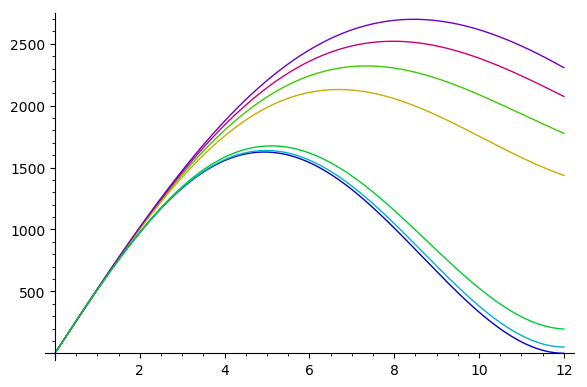

In [339]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol_rh[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
             H2_8pi_z_sol_rh  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
            -
            (H2_8pi_rho_sol_rh[0](rh,ph,0,1) + 
             H2_8pi_phi_sol_rh[0](rh,ph,0,1) +
             H2_8pi_z_sol_rh  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [340]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [341]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[39256791667.21566,
 74407230412.6094,
 101838894021.18883,
 118874230095.47774,
 124110901855.42348,
 117624185462.61386,
 101008152401.87349,
 77248904284.29366,
 50440463080.35459,
 25370328061.134583,
 7015545749.952967,
 0.0]

In [342]:
if 1 < n_layers:
    print([H2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[5937102860.666726, 11253170770.598639, 15401869672.535564, 17978252974.47373, 18770234630.792095, 17789199227.324665, 15276230305.815968, 11682938700.073835, 7628494457.376216, 3836947465.9236403, 1061014284.9745078, 0.0]


In [343]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [344]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[39723444577.68683,
 78053089664.72208,
 113663019446.85999,
 145359198506.54922,
 172135939863.6535,
 193221676571.28677,
 208111539934.49442,
 216585070176.34982,
 218708305162.9984,
 214820448623.6339,
 205506248321.5709,
 191556056506.64673]

In [345]:
if 1 < n_layers:
    print([H2_8pi_phi_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[6007678325.752695, 11804561765.023262, 17190121995.464462, 21983775969.093754, 26033426003.112244, 29222382166.09646, 31474289329.525322, 32755805686.372154, 33076918644.862514, 32488928562.09169, 31080271284.976944, 28970477789.029995]


In [346]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [347]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [348]:
if 1 < n_layers:
    print([H2_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[0.00022147505935641229, 0.0017407163804879016, 0.005703476076061741, 0.012967027390297155, 0.023993272678125902, 0.038782542116650325, 0.05685519700867531, 0.07728343486097641, 0.09877072006209746, 0.11977151557650982, 0.13863992895154548, 0.15379290690354047]


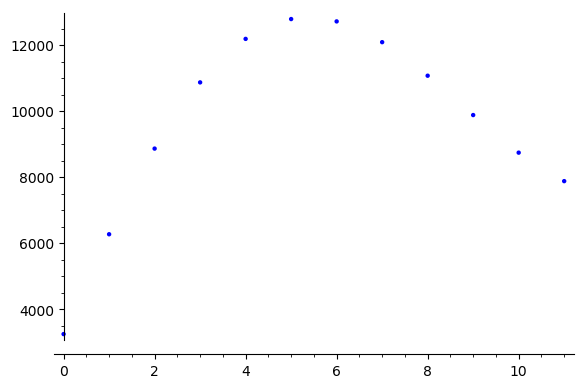

In [349]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([
    ((H2_8pi_rho_sol_rh_int_ph[n_layers - 1](rho,(n_layers)*h_sol,1) + 
     H2_8pi_phi_sol_rh_int_ph[n_layers - 1](rho,(n_layers)*h_sol,1) +
     H2_8pi_z_sol_rh_int_ph  [n_layers - 1](rho,(n_layers)*h_sol,1) )
    -
    (H2_8pi_rho_sol_rh_int_ph[0](rho,0,1) + 
     H2_8pi_phi_sol_rh_int_ph[0](rho,0,1) +
     H2_8pi_z_sol_rh_int_ph  [0](rho,0,1) )
    +
    sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
    (E2_8pi_rho_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) + 
     E2_8pi_phi_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) ) for i in range(n_layers - 1)]))
    for rho in [1..int(a_val)] ])
plt.show ()

In [350]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [351]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [352]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [353]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_rho

840535788696.9934

In [354]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_phi

1906329463842.7861

In [355]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_z

0.0

In [356]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, n_layers*h_sol, 1)
f_surf_1_rho

311927502176.7448

In [357]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, n_layers*h_sol, 1)
f_surf_1_phi

707449457808.6017

In [358]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, n_layers*h_sol, 1)
f_surf_1_z

0.0

In [359]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [360]:
surf_f_z

-1727488292554.4329

In [361]:
f_dielectric_surf_rho

[1.19888008446110e12, 0.000000000000000]

In [362]:
f_dielectric_surf_phi

[5.28608321100120e11, 0.000000000000000]

In [363]:
f_dielectric_surf_z

[0.000000000000000, 0.000000000000000]

In [364]:
f_dielectric_surf = 0
print(f_dielectric_surf)
for i in range(n_layers - 1):
    f_dielectric_surf += f_dielectric_surf_rho[i] + f_dielectric_surf_phi[i] + f_dielectric_surf_z[i]
    print(f_dielectric_surf)

0
1.72748840556122e12
1.72748840556122e12


In [365]:
sum_surf_f_z = surf_f_z + f_dielectric_surf

In [366]:
sum_surf_f_z

113006.786621094

In [367]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [368]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [369]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [370]:
#ED_8pi_rho_0 = epsilon[0].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [371]:
#ED_8pi_rho_1 = epsilon[1].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [372]:
ED_8pi_rho = []
for i in range(n_layers):
    ED_8pi_rho += [epsilon[i].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [373]:
#ED_8pi_rho_0 + ED_8pi_rho_1
sum(ED_8pi_rho)

9.86705880069494e6

In [374]:
#ED_8pi_phi_0 = epsilon[0].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [375]:
#ED_8pi_phi_1 = epsilon[1].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [376]:
ED_8pi_phi = []
for i in range(n_layers):
    ED_8pi_phi += [epsilon[i].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [377]:
#ED_8pi_phi_0 + ED_8pi_phi_1
sum(ED_8pi_phi)

4.35056804632470e6

In [378]:
#ED_8pi_z_0 = epsilon[0].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1) if E_mode else 0

In [379]:
#ED_8pi_z_1 = epsilon[1].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1) if E_mode else 0

In [380]:
ED_8pi_z = []
for i in range(n_layers):
    ED_8pi_z += [epsilon[i].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [381]:
#ED_8pi_z_0 + ED_8pi_z_1
sum(ED_8pi_z)

0.000000000000000

In [382]:
#H2_8pi_rho_0 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [383]:
#H2_8pi_rho_1 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [384]:
HB_8pi_rho = []
for i in range(n_layers):
    HB_8pi_rho += [mu[i].subs(digit_values) * H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [385]:
#H2_8pi_rho_0 + H2_8pi_rho_1
sum(HB_8pi_rho)

4350568.187338341

In [386]:
#H2_8pi_phi_0 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [387]:
#H2_8pi_phi_1 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [388]:
HB_8pi_phi = []
for i in range(n_layers):
    HB_8pi_phi += [mu[i].subs(digit_values) * H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [389]:
#H2_8pi_phi_0 + H2_8pi_phi_1
sum(HB_8pi_phi)

9867059.120512908

In [390]:
#H2_8pi_z_0 = H2_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [391]:
#H2_8pi_z_1 = H2_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [392]:
HB_8pi_z = []
for i in range(n_layers):
    HB_8pi_z += [mu[i].subs(digit_values) * H2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [393]:
#H2_8pi_z_0 + H2_8pi_z_1
sum(HB_8pi_z)

1.01454097776106e-05

In [394]:
#H2_8pi_phi_0 + H2_8pi_phi_1

In [395]:
#ED_8pi_rho_0 + ED_8pi_rho_1

In [396]:
#ED_8pi_z_0 + ED_8pi_z_1

In [397]:
#ED_8pi_rho_0 + ED_8pi_rho_1 + ED_8pi_z_0 + ED_8pi_z_1

In [398]:
field_energy = sum(HB_8pi_rho) + sum(HB_8pi_phi) + sum(HB_8pi_z) \
             + sum(ED_8pi_rho) + sum(ED_8pi_phi) + sum(ED_8pi_z)
field_energy

2.84352541548810e7

In [399]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [400]:
# Abraham force
# Minkovsky form without dissipation
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [401]:
Abraham_Minkovsky_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z += [lambda r,p,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re(E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im(E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re(E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im(E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [402]:
print(Abraham_Minkovsky_f_z[0](rh, ph, z))

1/32*(4*A_z_0^2*k_0*m^2*mu_0*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)*sin(m*varphi)^2*sin(k_0*z)/(c*kappa^4*rho^2) - 4*A_z_0^2*k_0*m^2*mu_0*omega^2*cos(k_0*z)*real_part(bessel_J(m, kappa*rho))^2*sin(m*varphi)^2*sin(k_0*z)/(c*kappa^4*rho^2) + (A_z_0*mu_0*omega^2*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*sin(k_0*z)/(c*kappa) - A_z_0*mu_0*omega^2*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*sin(k_0*z)/(c*kappa))*(A_z_0*k_0*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/kappa - A_z_0*k_0*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/kappa) - (A_z_0*k_0*omega*cos(m*varphi)*cos(k_0*z)*real_part(bessel_J(m + 1, kappa*rho))/kappa - A_z_0*k_0*omega*cos(m*varphi)*cos(k_0*z)*real_part(bessel_J(m - 1, kappa*rho))/kappa)*(A_z_0*mu_0*omega*cos(m*varphi)*real_part(bessel_J(m + 1, kappa*rho))*sin(k_0*z)/(c*kappa) - A_z_0*mu_0*omega*cos(m*varphi)*real_part(bessel_J(m - 1, kappa*rho))*sin(k_0*z)/(c*kappa)))*(epsilon_0*mu_0 - 1)/(pi*c)


In [403]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [404]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [405]:
Abraham_Minkovsky_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z_s += [lambda r,p,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re(E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im(E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re(E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im(E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [406]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [407]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [408]:
i = 0
display(Math(latex(
(Re(-I*omega * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
- Re(-I*omega * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
+(Re(E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im(E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
- Re(E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im(E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
)))

<IPython.core.display.Math object>

In [409]:
# Abraham force
# Abraham form with dissipation
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E x H]).diff(t)
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (mu) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re((epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (mu) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(H_ph) + Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(H_ph) 
#        - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(H_rh) - Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(H_rh)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(-I*omega * H_ph) + Im((epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(-I*omega * H_ph)
#        - Re((epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(-I*omega * H_rh) - Im((epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(-I*omega * H_rh)) 
#       )


In [410]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [411]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [412]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [413]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [414]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [415]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [416]:
i = 0
display(Math(latex(
 (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
- Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
+(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
- Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
)))

<IPython.core.display.Math object>

In [417]:
calc_Abraham_force = False

In [418]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda r,p,z, a0, i=i: Abraham_f_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [419]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [1..int(a_val)]]

In [420]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [1..int(a_val)]]

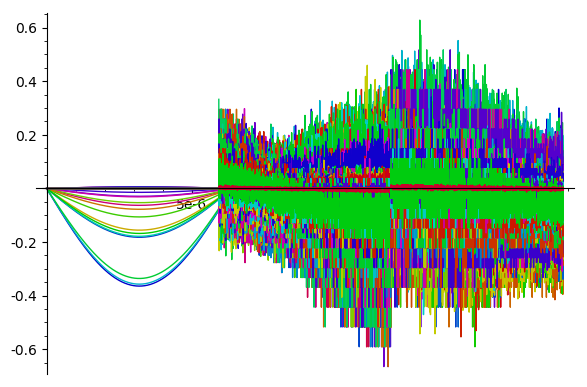

In [421]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
plt.show ()

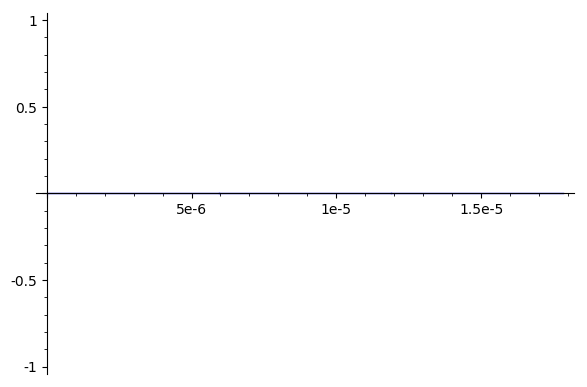

In [422]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]],(z, i*h_sol, (i+1)*h_sol))
plt.show ()

In [423]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[0]

In [424]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[0]

In [426]:
i = 1
import numpy
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0] for z in numpy.arange(i*h_sol,(i+1)*h_sol, h_sol/20)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [427]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[0]

In [428]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[0]

In [429]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda r,p,z, a0, i=i: Abraham_f_z_sol[i](r,p,z, a0) * r]

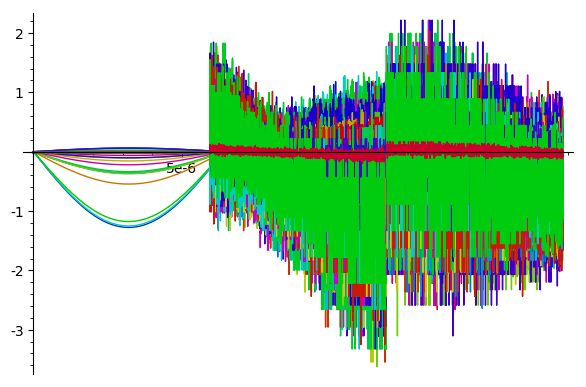

In [430]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
plt.show ()

In [431]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda r,z,a0, i=i: 
                                  num_int(
                                      lambda p : Abraham_f_z_sol_rh[i](r,p,z,a0), 
                                      0, 2*pi)
                                 ]

In [432]:
#[Abraham_f_z_sol_rh_int_ph [0](rho,h_sol/2, 1) for rho in [1..int(a_val)
#                                                          ]]

In [433]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : Abraham_f_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [434]:
#Abraham_f_z_sol_rh_int_ph_int_rh [0](0,a_val,h_sol/2, 1)

In [435]:
#[Abraham_f_z_sol_rh_int_ph_int_rh [0](0,a_val, z, 1) for z in [
#    0,        1*h_sol/10, 2*h_sol/10, 3*h_sol/10, 4*h_sol/10, 5*h_sol/10, 
#              6*h_sol/10, 7*h_sol/10, 8*h_sol/10, 9*h_sol/10, h_sol
#]]

In [436]:
#[Abraham_f_z_sol_rh_int_ph_int_rh [1](0,a_val, z, 1) for z in [
#    h_sol,    11*h_sol/10, 12*h_sol/10, 13*h_sol/10, 14*h_sol/10, 15*h_sol/10, 
#              16*h_sol/10, 17*h_sol/10, 18*h_sol/10, 19*h_sol/10, 2*h_sol
#]]

In [437]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [438]:
if calc_Abraham_force:
    Abraham_f_z = []
    for i in range(n_layers):
        Abraham_f_z += [Abraham_f_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [439]:
if calc_Abraham_force:
    print(Abraham_f_z)

In [440]:
if calc_Abraham_force:
    print(sum(Abraham_f_z))

In [441]:
#Abraham_f_z_0_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10)

In [442]:
#Abraham_f_z_1_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10)

In [443]:
#Abraham_f_z_0_10

In [444]:
#Abraham_f_z_1_10

In [445]:
#Abraham_f_z_0_10 + Abraham_f_z_1_10

In [446]:
#Abraham_f_z_0 + Abraham_f_z_1

In [447]:
sum_f_z = sum_surf_f_z
if calc_Abraham_force:
    sum_f_z += sum(Abraham_f_z)

In [448]:
sum_f_z

113006.786621094

In [449]:
#sum_f_z_10 = surf_f_z_10 + Abraham_f_z_0_10 + Abraham_f_z_1_10

In [450]:
#sum_f_z_10

In [451]:
sum_f_z / (field_energy)

0.00397417888391532

In [452]:
S = pi.n() * a_val^2
S

452.389342116930

In [453]:
V = n_layers * h_sol * S
V

0.00806403879629688

In [454]:
h_sol

5.941813128312345e-06

In [455]:
# мкм
h_sol*10*1000 

0.05941813128312345

In [456]:
field_energy

2.84352541548810e7

In [457]:
# эрг / куб см
(field_energy)/V

3.52618022720066e9

In [458]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

https://iopscience.iop.org/article/10.1088/1367-2630/18/5/053042

A uniform electric field $E={10}^{6}$ V m−1 along the $z$ direction is applied. This electric field corresponds to an average laser intensity of ${I}_{0}=1.33\ \mathrm{mW}\;\mu {{\rm{m}}}^{-2}$ as used under typical experiment conditions

In [459]:
# 1.33 мВт / 1 мкм^2
# 1.33 * 10^4 эрг в сек / 0.0001 см
w = (1.33 * 10^4 /(0.0001^2*c)).subs(c_value)
w # эрг в куб см

44.3640246613542

In [460]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

0.176310570014653

In [461]:
# Ньютон
F_z / 10^5

1.76310570014653e-6

In [462]:
# gramm
F_z / 10^5 *101

0.000178073675714799

In [463]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

0.0752778021634314

In [464]:
omega_value[0].rhs().n()

2.98046134067856e15

In [465]:
# число ячеек в #сантиметре
nLayers_per_sm = 1/(15e-06 + n_layers*h_sol)
nLayers_per_sm

30464.1771363122

In [466]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

2.29327629953904

In [467]:
# кг / см толщины
1.0/(15e-06 + n_layers*h_sol) * F_z / 10^5 *101/1000

0.00542486800028985